In [1]:
import numpy as np
import pandas as pd
import tqdm
import collections 
import time
import pickle
import random
import matplotlib.pyplot as plt

In [2]:
# CONSTANT
WINDOW_SIZE = 40
THRESHOLD = 25

In [3]:
def select_random_sample(dic,number,file_name=None):
    random.seed(42)
    random_list = random.sample(list(dic.keys()),number)
    dic_random = {i: dic[i] for i in random_list}
    if (file_name != None):
        with open('data/' + file_name + '.pkl', 'wb') as file:
            pickle.dump(dic_random, file)
    return dic_random

In [4]:
def load_dic(file_name):
    with open('data/' + file_name + '.pkl', 'rb') as file:
        data = pickle.load(file)
    return data

In [5]:
def generate_dic(ls_X,ls_y):
    dic = {}
    for i in range(0,len(ls_X)):
        # X
        df_chunk = pd.DataFrame(ls_X[i]).T
        # y
        label_chunk = ls_y[i]
        dic[i] = (df_chunk,label_chunk)
    return dic

In [6]:
def convert_to_np_array(data,file_name=None):
    X_array = []
    y_array = []
    for i in data.keys():
        temp_x = data[i][0].to_numpy()
        X_array.append(temp_x)
        temp_y = data[i][1]
        y_array.append(temp_y)
    X_array = np.array(X_array)
    y_array = np.array(y_array)
    if (file_name != None):
        np.save('data/X_' + file_name + '_array.npy', X_array)
        np.save('data/y_' + file_name + '_array.npy', y_array)
    return X_array,y_array

In [7]:
train_df = pd.read_csv('data/raw182_Training_Relabeled_Auto_25.csv')
test_df = pd.read_csv('data/raw91_Testing_Relabeled_Auto_25.csv')

### visualization

In [8]:
train_df.head()

,ms_accelerometer_x,ms_accelerometer_y,ms_accelerometer_z,outcome
0,0.963379,0.063477,-0.036865,0
1,0.990723,0.057617,0.005371,0
2,0.990967,0.108398,0.034668,0
3,0.976807,0.184570,0.060791,0
4,0.999268,0.143311,0.055176,0


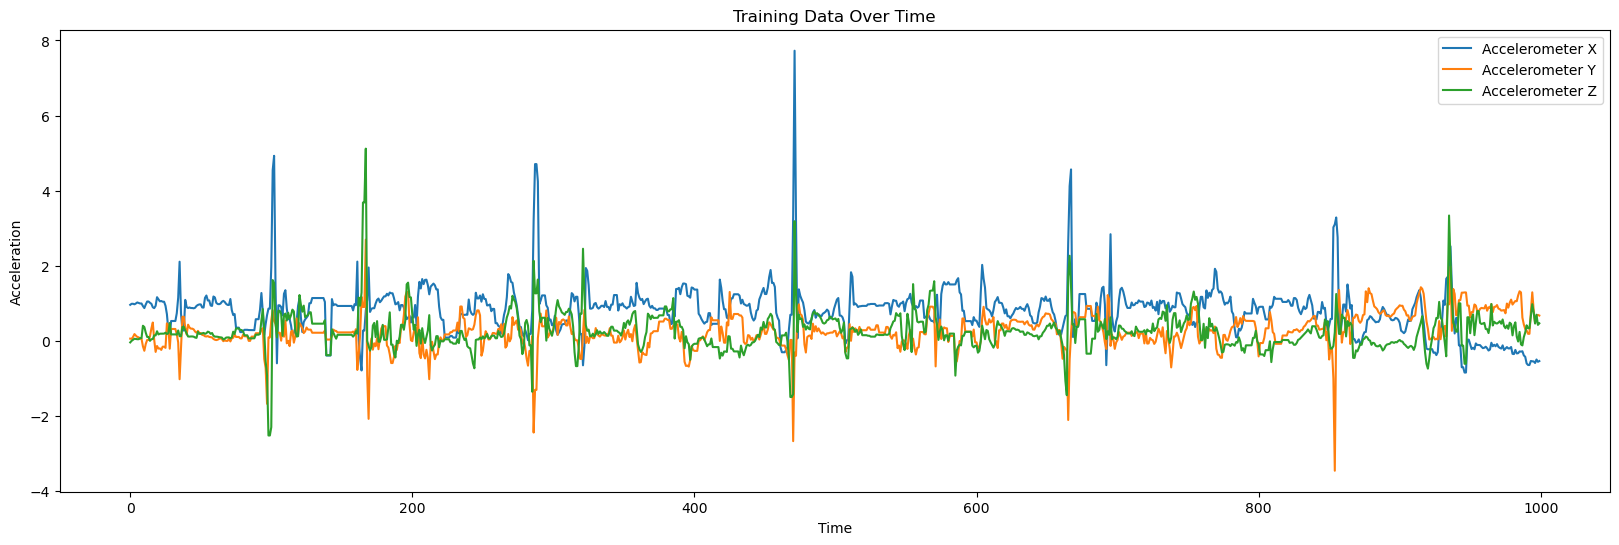

In [9]:
data = train_df[:1000]
# Plotting
plt.figure(figsize=(20, 6))
plt.plot(data.index, data[' ms_accelerometer_x'], label='Accelerometer X')
plt.plot(data.index, data[' ms_accelerometer_y'], label='Accelerometer Y')
plt.plot(data.index, data[' ms_accelerometer_z'], label='Accelerometer Z')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Training Data Over Time')
plt.legend()

# Display the plot
plt.show()

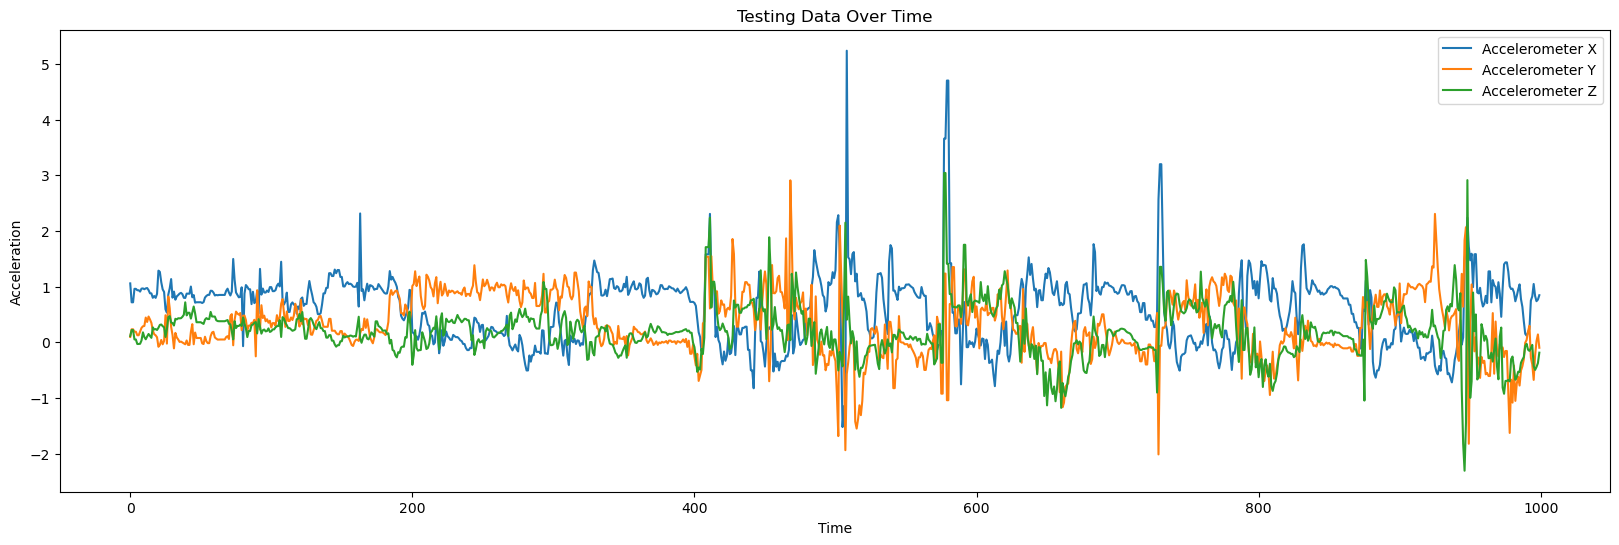

In [10]:
data = test_df[:1000]
# Plotting
plt.figure(figsize=(20, 6))
plt.plot(data.index, data[' ms_accelerometer_x'], label='Accelerometer X')
plt.plot(data.index, data[' ms_accelerometer_y'], label='Accelerometer Y')
plt.plot(data.index, data[' ms_accelerometer_z'], label='Accelerometer Z')

# Adding labels and legend
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Testing Data Over Time')
plt.legend()

# Display the plot
plt.show()

### data preprocessing

- sliding window = 40
- if there is equal or more than 25 fall -> label of chunk is fall

In [11]:
n = 40
X_train_notfall, X_train_fall, y_train_notfall, y_train_fall = list(), list(), list(), list()
for i in tqdm.tqdm(range(0, len(train_df) - WINDOW_SIZE)):
    chunk = list()
    
    chunk.append(train_df[' ms_accelerometer_x'][i : i + n])
    chunk.append(train_df[' ms_accelerometer_y'][i : i + n])
    chunk.append(train_df[' ms_accelerometer_z'][i : i + n])
    
    count = collections.Counter(train_df['outcome'][i : i + n])
    num_fall = count[1]
    
    if num_fall >= THRESHOLD:
        y_train_fall.append(1)
        X_train_fall.append(chunk)
    else:
        y_train_notfall.append(0)
        X_train_notfall.append(chunk)

100%|██████████████████████████████████| 33980/33980 [00:01<00:00, 20720.69it/s]


In [12]:
n = 40
X_test_notfall, X_test_fall, y_test_notfall, y_test_fall = list(), list(), list(), list()
for i in tqdm.tqdm(range(0, len(test_df) - WINDOW_SIZE)):
    chunk = list()
    
    chunk.append(test_df[' ms_accelerometer_x'][i : i + n])
    chunk.append(test_df[' ms_accelerometer_y'][i : i + n])
    chunk.append(test_df[' ms_accelerometer_z'][i : i + n])
    
    count = collections.Counter(test_df['outcome'][i : i + n])
    num_fall = count[1]
    
    if num_fall >= THRESHOLD:
        y_test_fall.append(1)
        X_test_fall.append(chunk)
    else:
        y_test_notfall.append(0)
        X_test_notfall.append(chunk)

100%|██████████████████████████████████| 17189/17189 [00:00<00:00, 19262.49it/s]


In [13]:
len_train_notfall = len(X_train_notfall)
len_train_fall = len(X_train_fall)
print('number of train data fall', len_train_fall)
print('number of train data not fall', len_train_notfall)

number of train data fall 2912
number of train data not fall 31068


In [14]:
len_test_notfall = len(X_test_notfall)
len_test_fall = len(X_test_fall)
print('number of test data fall', len_test_fall)
print('number of test data not fall', len_test_notfall)

number of test data fall 1456
number of test data not fall 15733


### select random

In [15]:
dic_train_fall = generate_dic(X_train_fall,y_train_fall)
len(dic_train_fall)

2912

In [16]:
# dic_train_fall[0]

In [17]:
dic_train_notfall = generate_dic(X_train_notfall,y_train_notfall)
len(dic_train_notfall)

31068

In [18]:
# dic_train_notfall[0]

In [19]:
dic_test_fall = generate_dic(X_test_fall,y_test_fall)
len(dic_test_fall)

1456

In [20]:
# dic_test_fall[0]

In [21]:
dic_test_notfall = generate_dic(X_test_notfall,y_test_notfall)
len(dic_test_notfall)

15733

In [22]:
# dic_test_notfall[0]

In [23]:
dic_train_notfall_random = select_random_sample(dic_train_notfall,len_train_fall)
len(dic_train_notfall_random)

2912

In [24]:
# dic_train_notfall_random[list(dic_train_notfall_random.keys())[0]]

In [25]:
dic_test_notfall_random = select_random_sample(dic_test_notfall,len_test_fall)
len(dic_test_notfall_random)

1456

In [26]:
# dic_test_notfall_random[list(dic_test_notfall_random.keys())[0]]

### create numpy array

In [27]:
X_train_fall_array,y_train_fall_array = convert_to_np_array(dic_train_fall,"train_fall")

In [28]:
X_train_notfall_array, y_train_notfall_array = convert_to_np_array(dic_train_notfall_random,"train_notfall")

In [29]:
X_test_fall_array, y_test_fall_array = convert_to_np_array(dic_test_fall,"test_fall")

In [30]:
X_test_notfall_array, y_test_notfall_array = convert_to_np_array(dic_test_notfall_random,"test_notfall")

### load numpy array

In [31]:
def load_np_array(file_name):
    X_array = np.load('data/X_' + file_name + '_array.npy')
    y_array = np.load('data/y_' + file_name + '_array.npy')
    return X_array, y_array

In [32]:
X_train_fall, y_train_fall = load_np_array("train_fall")

In [33]:
print(X_train_fall.shape)
print(y_train_fall.shape)

(2912, 40, 3)
(2912,)


In [34]:
X_train_notfall, y_train_notfall = load_np_array("train_notfall")

In [35]:
print(X_train_notfall.shape)
print(y_train_notfall.shape)

(2912, 40, 3)
(2912,)


In [36]:
X_test_fall, y_test_fall = load_np_array("test_fall")

In [37]:
print(X_test_fall.shape)
print(y_test_fall.shape)

(1456, 40, 3)
(1456,)


In [38]:
X_test_notfall, y_test_notfall = load_np_array("test_fall")

In [39]:
print(X_test_notfall.shape)
print(y_test_notfall.shape)

(1456, 40, 3)
(1456,)
